<a href="https://colab.research.google.com/github/shubhamawasthi0301/modified_ID3_algorithm/blob/main/Covid_case_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting new COVID cases from mobility data using hybrid of ID3 and CART Regresssor


### Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import sys
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
import graphviz 

### Retrieving raw data from github

In [ ]:
df= pd.read_csv("https://github.com/shubhamawasthi0301/modified_ID3_algorithm/raw/main/changes-visitors-covid.csv")
df2 = pd.read_csv("https://github.com/shubhamawasthi0301/modified_ID3_algorithm/raw/main/owid-covid-data.csv")

In [ ]:
df

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,Afghanistan,AFG,2020-02-17,0.000,4.000,1.333,5.667,1.000,-6.333
1,Afghanistan,AFG,2020-02-18,0.750,4.250,0.750,6.500,1.500,-3.250
2,Afghanistan,AFG,2020-02-19,0.400,4.000,0.800,5.200,1.400,-1.600
3,Afghanistan,AFG,2020-02-20,0.000,3.833,0.833,5.000,1.000,-0.333
4,Afghanistan,AFG,2020-02-21,0.000,4.571,0.714,5.286,1.429,0.571
...,...,...,...,...,...,...,...,...,...
61945,Zimbabwe,ZWE,2021-05-28,32.286,57.429,-0.286,32.714,40.286,11.857
61946,Zimbabwe,ZWE,2021-05-29,33.143,58.143,-0.714,33.429,41.571,11.714
61947,Zimbabwe,ZWE,2021-05-30,34.714,60.000,-1.286,34.143,42.571,12.000
61948,Zimbabwe,ZWE,2021-05-31,35.143,61.000,-1.857,34.286,42.571,13.143


In [ ]:
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93326,ZWE,Africa,Zimbabwe,2021-05-30,38944.0,11.0,37.429,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93327,ZWE,Africa,Zimbabwe,2021-05-31,38961.0,17.0,37.857,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93328,ZWE,Africa,Zimbabwe,2021-06-01,38998.0,37.0,41.714,1599.0,5.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93329,ZWE,Africa,Zimbabwe,2021-06-02,39031.0,33.0,30.286,1599.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### Data Preparation and Preprocessing

#### Extarcting Data for India only

In [ ]:
country = "India"

In [ ]:
new_df = df.loc[df["Entity"]==country]

In [ ]:
new_df2 = df2.loc[df2["location"]==country]

In [ ]:
new_df

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143
...,...,...,...,...,...,...,...,...,...
24363,India,IND,2021-05-28,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
24364,India,IND,2021-05-29,-61.286,-24.429,23.714,-48.714,-40.000,-44.571
24365,India,IND,2021-05-30,-61.143,-24.714,23.714,-49.000,-39.143,-44.286
24366,India,IND,2021-05-31,-60.143,-23.429,23.286,-48.286,-38.000,-43.429


#### Removing unnecessary columns according to the question

In [ ]:
columns = ['location', 'date', 'new_cases']

In [ ]:
new_df2 = new_df2[columns]
new_df2

,location,date,new_cases
38584,India,2020-01-30,1.0
38585,India,2020-01-31,0.0
38586,India,2020-02-01,0.0
38587,India,2020-02-02,1.0
38588,India,2020-02-03,1.0
...,...,...,...
39070,India,2021-05-30,152734.0
39071,India,2021-05-31,127510.0
39072,India,2021-06-01,132788.0
39073,India,2021-06-02,134154.0


#### Understading the datasets

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 23897 to 24367
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 471 non-null    object 
 1   Code                   471 non-null    object 
 2   Day                    471 non-null    object 
 3   retail_and_recreation  471 non-null    float64
 4   grocery_and_pharmacy   471 non-null    float64
 5   residential            471 non-null    float64
 6   transit_stations       471 non-null    float64
 7   parks                  471 non-null    float64
 8   workplaces             471 non-null    float64
dtypes: float64(6), object(3)
memory usage: 36.8+ KB


In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 38584 to 39074
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   491 non-null    object 
 1   date       491 non-null    object 
 2   new_cases  491 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.3+ KB


#### Converting Date and Day column datatype to datetime

In [ ]:
new_df.loc['Day'] = pd.to_datetime(new_df['Day'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
new_df2.loc['date'] = pd.to_datetime(new_df2['date'])

In [ ]:
new_df.dtypes

Entity                   object
Code                     object
Day                      object
retail_and_recreation    object
grocery_and_pharmacy     object
residential              object
transit_stations         object
parks                    object
workplaces               object
dtype: object

In [ ]:
new_df2.dtypes

location     object
date         object
new_cases    object
dtype: object

#### Converting name of Day column to date

In [ ]:
new_df.rename(columns = {'Day':'date'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Merging the two datasets

In [ ]:
merged_df = new_df.merge(new_df2, how = 'inner', on = ['date'])

#### Dropping NULL Values

In [ ]:
merged_df.dropna(inplace=True)

#### Dropping unnecessary columns

In [ ]:
merged_df.drop(columns = ["Entity","Code","location","date"],inplace = True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   retail_and_recreation  471 non-null    object
 1   grocery_and_pharmacy   471 non-null    object
 2   residential            471 non-null    object
 3   transit_stations       471 non-null    object
 4   parks                  471 non-null    object
 5   workplaces             471 non-null    object
 6   new_cases              471 non-null    object
dtypes: object(7)
memory usage: 29.4+ KB


In [ ]:
col = list(merged_df.columns)

In [ ]:
merged_df[col] = merged_df[col].astype(float)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  471 non-null    float64
 1   grocery_and_pharmacy   471 non-null    float64
 2   residential            471 non-null    float64
 3   transit_stations       471 non-null    float64
 4   parks                  471 non-null    float64
 5   workplaces             471 non-null    float64
 6   new_cases              471 non-null    float64
dtypes: float64(7)
memory usage: 29.4 KB


#### Scaling data

In [ ]:
def calc_minmax(dataset):
  minmax = []
  for i in dataset:
    values = merged_df[i].tolist()
    min_value = min(values)
    max_value = max(values)
    minmax.append([min_value, max_value])
  return minmax

In [ ]:
minmax_arr = calc_minmax(merged_df)

In [ ]:
minmax_arr

[[-85.857, 0.667],
 [-64.143, 21.429],
 [0.0, 29.143],
 [-73.0, 2.333],
 [-63.714, 3.714],
 [-65.857, 5.571],
 [0.0, 414188.0]]

In [ ]:
minmax_arr[len(minmax_arr)-1][1]

414188.0

In [ ]:
def scale_dataset(dataset, minmax_arr):
	for col in dataset:
		for i in range(len(dataset)):
			dataset[col][i] = (dataset[col][i] - minmax_arr[merged_df.columns.get_loc(col)][0]) / (minmax_arr[merged_df.columns.get_loc(col)][1] - minmax_arr[merged_df.columns.get_loc(col)][0])

In [ ]:
def scale_y(Y, minmax_arr):
  min = minmax_arr[len(minmax_arr)-1][0]
  max = minmax_arr[len(minmax_arr)-1][1]
  return (Y-min)/(max-min)

In [ ]:
scale_dataset(merged_df, minmax_arr)

In [ ]:
def inverse_transform(Y, minmax_arr):
  min = minmax_arr[len(minmax_arr)-1][0]
  max = minmax_arr[len(minmax_arr)-1][1]
  return Y * (max-min) + min

In [ ]:
merged_df.head(5)

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,1.000000,0.769060,0.000000,0.995580,0.989411,0.964006,0.0
1,0.998070,0.770030,0.000000,0.995580,0.993119,0.964006,0.0
2,0.996914,0.770614,0.006863,0.992925,0.986445,0.966806,0.0
3,0.998070,0.772951,0.000000,1.000000,0.991888,0.968668,0.0
4,0.990638,0.769609,0.024500,0.988000,0.997879,0.924007,0.0


In [ ]:
merged_df.describe()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,0.499689,0.692239,0.479269,0.590519,0.436155,0.533755,0.145107
std,0.254397,0.232276,0.243218,0.265073,0.283105,0.220510,0.215899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.303794,0.610182,0.338229,0.415303,0.190677,0.462004,0.024070
50%,0.536591,0.744566,0.426483,0.623897,0.341105,0.572003,0.065359
75%,0.685197,0.859767,0.568610,0.837236,0.724580,0.678004,0.155877
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Finding Correlations between columns

In [ ]:
merged_df.corr()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
retail_and_recreation,1.000000,0.820786,-0.925891,0.970580,0.906370,0.928552,-0.134351
grocery_and_pharmacy,0.820786,1.000000,-0.840430,0.913562,0.664009,0.867805,-0.052792
residential,-0.925891,-0.840430,1.000000,-0.928817,-0.768427,-0.969960,0.313037
transit_stations,0.970580,0.913562,-0.928817,1.000000,0.880851,0.951951,-0.153770
parks,0.906370,0.664009,-0.768427,0.880851,1.000000,0.794867,-0.119766
workplaces,0.928552,0.867805,-0.969960,0.951951,0.794867,1.000000,-0.232405
new_cases,-0.134351,-0.052792,0.313037,-0.153770,-0.119766,-0.232405,1.000000


### Defining own train_test_split function

In [ ]:
#train_test slpit function
def split(X,y,test_fraction=0.2,random_state = 5):                                            
  #default value of test_size_fraction = 20%
  #Raise an exception if test_fraction is not between 0 and 1
  if test_fraction<=0 or test_fraction >=1 :
    try:
      raise ValueError("test_fraction should be between 0 and 1 (exclusive)")
    except ValueError as err:
      print(err)
      sys.exit(1)

  #test_size = 20% of size of the dataset
  #choose random indices between 0 and the number of data_points 
  #the number of indices = test_size
  random.seed(random_state)
  ar = random.sample(range(X.shape[0]),int(test_fraction*X.shape[0]))            
  #print("length of index array : ",len(ar),"\n")

  #creating an array filled with false values
  ind = np.full(X.shape[0],False,dtype=bool)         
  
  #marking the test_indices as true                        
  ind[ar]=True;
  #Splitting the dataset into training and testing
  X_train = X[~ind]
  y_train = y[~ind]
  X_test = X[ind]
  y_test = y[ind]

  return X_train,X_test,y_train,y_test

### Defining own mathematical functions - Mean, Standard Deviation, Residual Sum of Squares (RSS), Mean Squared Error, Root Mean Squared Error, R2 Score

In [ ]:
def mean(X):
  #if non-numeric column is input then return 0 
  if not pd.api.types.is_numeric_dtype(X):
      return None
  sum = 0
  for i in X:
      sum+=i
  if X.shape[0]!=0:
      sum/=X.shape[0]
  return sum
    
def std_dev(X):
  #if non-numeric column is input then return -1 
  if not pd.api.types.is_numeric_dtype(X):
      return -1
  #mean of the array
  mn = mean(X)
  #mean of sqaures
  sq = mean(X**2)
  #standard_deviation = mean of squares - square of mean
  return (sq-mn**2)**0.5
  
def RSS(X):
  #if non-numeric column is input then return -1 
  if not pd.api.types.is_numeric_dtype(X):
      return -1
  #mean of the array
  mn = mean(X)
  rss = np.sum((X-mn)**2)
  return rss

def mse(y, y_hat) :
  return mean((y-y_hat)**2)

def rmse(y, y_hat) :
  return mean((y-y_hat)**2)**0.5

def r2_score(y,y_hat):
  ss_res = mse(y,y_hat)
  mn = np.full(y.shape,mean(y))
  ss_tot = mse(y,mn)
  return 1-ss_res/ss_tot

### Defining own function to create graph from tree dictionary

In [ ]:
def graph_tree(dec_tree,graph):
  # print(dec_tree)
  if len(dec_tree)==0:
    return "emptry tree"
  key =list(dec_tree.keys())[0]
  parent_node = "{feature_name} <= {feature_value}".format(feature_name = key[0],feature_value=key[1])
  left_tree = dec_tree[key][0]
  right_tree = dec_tree[key][1]

  if not isinstance(left_tree,dict):
    l_tree = "{0}".format(left_tree)
    # print(l_tree)
    graph.edge(parent_node,l_tree,"True")

  else:
    # print("Left tree",left_tree)
    key_l =list(left_tree.keys())[0]
    l_tree = "{feature_name} <= {feature_value}".format(feature_name = key_l[0],feature_value=key_l[1]) 
    graph.edge(parent_node,l_tree,"True")
    graph_tree(left_tree,graph)

  if not isinstance(right_tree,dict):
    r_tree = "{0}".format(right_tree)
    # print(r_tree)
    graph.edge(parent_node,r_tree,"False")

  else:
    # print("right tree",right_tree)
    key_r =list(right_tree.keys())[0]
    r_tree = "{feature_name} <= {feature_value}".format(feature_name = key_r[0],feature_value=key_r[1]) 
    graph.edge(parent_node,r_tree,"False")
    graph_tree(right_tree,graph)

### Cleaning Data and seperating input and output dfs

In [ ]:
mask = merged_df["new_cases"]>0

In [ ]:
X = merged_df[mask].drop(columns= ["new_cases"])
Y = merged_df.loc[mask,'new_cases']

In [ ]:
X

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
14,0.987333,0.754593,0.000000,0.980407,0.972460,0.980008
16,0.987333,0.769609,0.004907,0.978509,0.972460,0.994008
17,0.987333,0.776294,0.004907,0.980407,0.972460,0.996010
18,0.985692,0.777965,0.009814,0.984203,0.966112,0.996010
19,0.988986,0.789651,0.009814,0.993681,0.972460,0.994008
...,...,...,...,...,...,...
466,0.279032,0.457428,0.828432,0.316687,0.336863,0.285994
467,0.283979,0.464100,0.813712,0.322382,0.351694,0.298006
468,0.285632,0.460770,0.813712,0.318585,0.364404,0.301996
469,0.297189,0.475786,0.799025,0.328063,0.381355,0.313995


In [ ]:
Y

14     0.000005
16     0.000056
17     0.000005
18     0.000002
19     0.000007
         ...   
466    0.419592
467    0.399705
468    0.368755
469    0.307855
470    0.320598
Name: new_cases, Length: 454, dtype: float64

### Splitting X and Y into train-test

In [ ]:
X_train,X_test,Y_train,Y_test = split(X,Y)
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

364 364 90 90


### CART Regressor Function

In [ ]:
class CART_regressor:

    def __init__(self):
      self.dec_tree = dict()
      self.depth = 0

    def fit(self, input_features, target_variable,max_depth=float('inf'),min_rssr=0,min_instances=0):
      data = input_features.copy()

      #appending the target variable to the dataframe
      data[target_variable.name] = target_variable
      
      #flushing any old value of depth
      self.depth =0

      #growing the decision tree
      self.dec_tree = dict()
      self.dec_tree = self.decision_tree(data,data,target_variable.name,max_depth=max_depth,min_rssr=min_rssr,min_instances=min_instances)

    def RSS_split(self,input_data, feature_name,feature_value, target_name):
      #function to calculate the total RSS after splitting for a particular feature value

      #if data type of the column is not numeric return None
        if not pd.api.types.is_numeric_dtype(input_data[feature_name]):
            return None
        
        mask = input_data[feature_name]<=feature_value
        
        #divinding the data into two classes: one less than than the feature value and the other greater than the feature value
        class_1 = input_data[mask]
        class_2 = input_data[~mask]
        
        #RSS
        rss_total = RSS(class_1[target_name])+RSS(class_2[target_name])
        return rss_total
    
    def feature_split_point(self,input_data, feature_name,target_name):
        #function to calculate the best split point for a particular feature
        #returns the split value and the RSS

        #sorting the values by the feature
        inp_df = input_data.sort_values(by=feature_name)
        
        unique_val = inp_df[feature_name].unique()
        #array containing mean of adjacent values
        split_candidates = [(unique_val[i] + unique_val[i+1])/2 for i in range(unique_val.shape[0]-1)]
        
        #initializing the values
        parent_rss = RSS(input_data[target_name])
        rss_min=parent_rss
        best_split_value = None
        
        for value in split_candidates :
            rss= self.RSS_split(inp_df,feature_name,value,target_name)
            if rss<rss_min :
                rss_min = rss
                best_split_value = value
        
        if parent_rss == rss_min :
          #if rss is unchanged it means no splitting should be done
          rss_min = None        
        return best_split_value,rss_min
      
    def best_split(self,input_data,target_name):
      #function to calulate the best_split point for any sub-dataset
      #returns the best-split column and corresponding feature value as well as RSS
      best_feature = None
      best_split_val = None
      best_rss = RSS(input_data[target_name])

      #extracting the list of input features
      features = list(input_data.columns)
      features.remove(target_name)

      for feature in features:  #looping over all the features
        split_val, rss = self.feature_split_point(input_data,feature,target_name)

        if split_val is not None and rss is not None and rss<best_rss : 
          #if splitting value and rss are not None and
          #if the residual sum of squares is less than the best so far then 
          #update the column to split and store corresponding split value and rss 
          best_rss = rss
          best_split_val = split_val
          best_feature = feature

      return best_feature,best_split_val,best_rss
    
    def split_data(self,input_data,feature_name,feature_value):
      #function to split the data into two halfs depending on the feature value
      
      if feature_name in input_data.columns : #checking if feature is present in the dataset 
        mask = input_data[feature_name]<=feature_value
        lhs_data = input_data[mask]
        rhs_data = input_data[~mask]

        return lhs_data,rhs_data
      else:
         #checking if feature is not present in the dataset, then return none
        return None
    
    def decision_tree(self, input_data, original_data,target_name,max_depth=float('inf'),curr_depth=0,min_instances=0,min_rssr=0, parent_node_mean = None):
       
        #if the current_depth is more than the depth of the tree, update the tree depth
        self.depth = max(self.depth,curr_depth)

        #if input data has no rows, then return the mean of the original data
        if len(input_data)==0:
          return mean(original_data[target_name])
        #if input data has lesser no. of instances than the minimum then do not split further, instead return the mean   
        elif len(input_data) <= min_instances :
          return mean(input_data[target_name])
        #if feature space is 0 or current depth is equal to the max depth then return the mean of the parent node
        elif len(input_data.columns)==0 or curr_depth == max_depth :
          return parent_node_mean
        else:
          parent_node_mean = mean(input_data[target_name])  #mean of the current data, passed to the next subtree as parent node mean
          parent_rss = np.sum((input_data[target_name]-parent_node_mean)**2)
          #getting the best split column, corresponding feature value and the standard deviation reduction for that value
          best_feature,best_split_val,best_rss = self.best_split(input_data,target_name)
          
          if best_feature is not None:  #checking if there is a best feature present if there is a best feature present
            #if the RSS reduction for the best split in all columns is less than the minimum required, then don't split, instead return the mean
            if (parent_rss-best_rss) <min_rssr :
              return parent_node_mean
            """
            Creating a tree using a dictionary where the key is a tuple: (best split feature name, split value).
            The value corresponding to the key would be a list of two elements which can which can either be a subtree itself or a float value (the regression output)

            """  
            tree = {(best_feature,best_split_val): []}

            #splitting the data into two regions: lhs and rhs.
            #lhs corresponds to the data having feature value <= the split value and the remaining is assigned to rhs
            lhs,rhs = self.split_data(input_data,best_feature,best_split_val)
            
            if len(rhs)==0 or len(lhs)==0:  #if either of lhs or rhs is empty then it is not actually a split, return the mean
              return parent_node_mean
            #recursively calling the decision tree function on lhs as well as rhs to get either a sub_tree or a float value
            sub_tree_1 = self.decision_tree(lhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_rssr,parent_node_mean)
            sub_tree_2 = self.decision_tree(rhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_rssr,parent_node_mean)

            #if the recursion call to both the lhs and rhs returns a float value which is the identical then do not split, return the common answer 
            if not isinstance(sub_tree_1,dict) and not isinstance(sub_tree_2,dict)  and sub_tree_1 ==sub_tree_2 :
              return sub_tree_1

            #append the return value of the recursion calls to list of the current dictionary
            tree[(best_feature,best_split_val)].append(sub_tree_1)
            tree[(best_feature,best_split_val)].append(sub_tree_2)
            return tree
          else:
            #if there is not a valid best feature present, then return the mean of the parent node
            return parent_node_mean   
    
    def pred(self,X,columns,tree):
      #function to predict the target value. It expects a single row as an input
      for attr in list(columns):  #looping over all the feature names
        #creating a list of the features present in the current level of the tree
        features = [i[0] for i in list(tree.keys())]

        #if the attribute is present in the current level of the tree
        if attr in features:
          ind = features.index(attr)    #index of the feature in the features list
          key = list(tree.keys())[ind]  #corresponding key (a tuple)
          val = key[1]                  #the best split value of that feature
          
          """
          if the value in the input is less than the best split value then,
          the answer is the next node towards the left half
          otherwise the answer is the right node in the next level

          """
          if X[attr]<=val:
            answer = tree[key][0]
          else:
            answer = tree[key][1]

          if not isinstance(answer,dict): 
            #if the answer is a float value then return the answer
            return answer
          else:
            sub_tree = answer
            #if the answer is a sub_tree (having the data type as a dictionary)
            #then recursively call the pred function again on the subtree
            return self.pred(X,columns,sub_tree)

    def predict(self,X) :
      #a wrapper function to apply the pred function on the entire column
      #returns a column of predictions
      Y_pred = X.apply(self.pred, axis=1,args=(X.columns,self.dec_tree, )) 
      return Y_pred
    
    def print_tree(self):
      #function to print the decision tree
      graph = graphviz.Digraph()  #creating a digraph
      graph.node_attr['shape']='box'
      graph.node_attr['style']='rounded'
      #calling the graph function to generate the graph
      graph_tree(self.dec_tree,graph)
      #displaying the graph
      return graph

### CART regressor object and application

In [ ]:
model_2 = CART_regressor()

In [ ]:
model_2.fit(X_train,Y_train,max_depth=9)

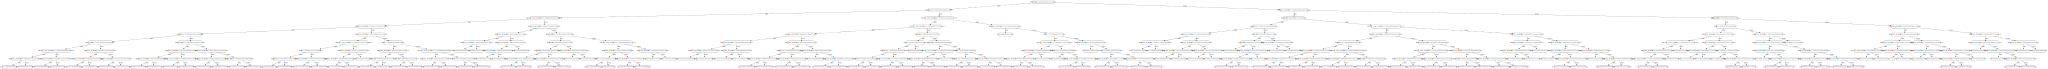

In [ ]:
model_2.print_tree()

### Hyperparameter Tuning for CART

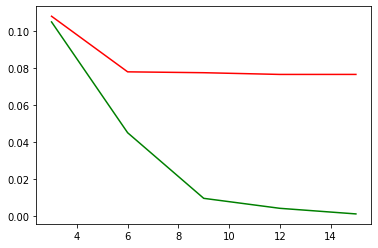

In [ ]:
max_depths = [i*3 for i in range(1,6)]
h_model_2 = CART_regressor()
rmse_train = []
rmse_test = []
for max_depth in max_depths:
  h_model_2.fit(X_train,Y_train,max_depth = max_depth)
  rmse_train.append(rmse(Y_train,h_model_2.predict(X_train)))
  rmse_test.append(rmse(Y_test,h_model_2.predict(X_test)))
plt.plot(max_depths,rmse_test,'r')
plt.plot(max_depths,rmse_train,'g')

Best Value of max_depth for CART = 9

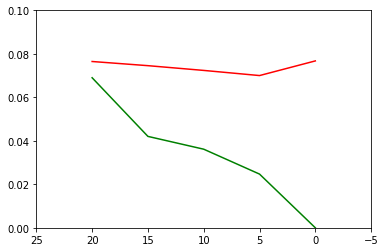

In [ ]:
min_inst = [30-5*i for i in range(2,7)]
h_model_2 = CART_regressor()
rmse_train = []
rmse_test = []
for min_instances in min_inst:
  h_model_2.fit(X_train,Y_train,min_instances=min_instances)
  rmse_train.append(rmse(Y_train,h_model_2.predict(X_train)))
  rmse_test.append(rmse(Y_test,h_model_2.predict(X_test)))
plt.plot(min_inst,rmse_test,'r')
plt.plot(min_inst,rmse_train,'g')
plt.axis([25,-5,0,0.1])
plt.show()

Best Value of min_instances for CART = 5

### ID3-A Regressor Function

In [ ]:
class ID3_A_regressor:

    def __init__(self):
      self.dec_tree = dict()
      self.depth = 0

    def fit(self, input_features, target_variable,max_depth=float('inf'),min_sdr=0,min_instances=0):
      data = input_features.copy()

      #appending the target variable to the dataframe
      data[target_variable.name] = target_variable
      
      #flushing any old value of depth
      self.depth =0

      #growing the decision tree
      self.dec_tree = dict()
      self.dec_tree = self.decision_tree(data,data,target_variable.name,max_depth=max_depth,min_sdr=min_sdr,min_instances=min_instances)

    def SDR_split(self,input_data, feature_name,feature_value, target_name):
      #function to calculate the standard deviation reduction for a particular feature value

      #if data type of the column is not numeric return None
        if not pd.api.types.is_numeric_dtype(input_data[feature_name]):
            return None
        parent_sd = std_dev(input_data[target_name])
        
        mask = input_data[feature_name]<=feature_value
        
        #divinding the data into two classes: one less than than the feature value and the other greater than the feature value
        class_1 = input_data[mask]
        class_2 = input_data[~mask]
        
        #calculating the probabilities of both the classes
        prob_1 = class_1.shape[0]/(class_1.shape[0]+class_2.shape[0])
        prob_2 = 1-prob_1
        
        #weighted_standard_dev
        weighted_sd = std_dev(class_1[target_name])*prob_1+std_dev(class_2[target_name])*prob_2
        return parent_sd - weighted_sd
    
    def feature_split_point(self,input_data, feature_name,target_name):
        
        #sorting the values by the feature
        inp_df = input_data.sort_values(by=feature_name)
        
        unique_val = inp_df[feature_name].unique()
        #array containing mean of adjacent values
        split_candidates = [(unique_val[i] + unique_val[i+1])/2 for i in range(unique_val.shape[0]-1)]
        
        #initializing the values
        sdr_max = -1
        best_split_value = None
        
        for value in split_candidates :
            sdr= self.SDR_split(inp_df,feature_name,value,target_name)
            if sdr>sdr_max :
                sdr_max = sdr
                best_split_value = value
                
        return best_split_value,sdr_max
      
    def best_split(self,input_data,target_name):
      #function to calulate the best_split point for any sub-dataset
      #returns the best-split column and corresponding feature value as well as SDR
      best_feature = None
      best_split_val = None
      best_sdr = -1

      #extracting the list of input features
      features = list(input_data.columns)
      features.remove(target_name)

      for feature in features:  #looping over all the features
        split_val, sdr = self.feature_split_point(input_data,feature,target_name)

        if sdr>0 and sdr>best_sdr : 
          #if there is actually a reduction in the standard deviation and the reduction is more than the best so far then 
          #update the column to split and store corresponding split value and SDR 
          best_sdr = sdr
          best_split_val = split_val
          best_feature = feature

      return best_feature,best_split_val,best_sdr
    
    def split_data(self,input_data,feature_name,feature_value):
      #function to split the data into two halfs depending on the feature value
      
      if feature_name in input_data.columns : #checking if feature is present in the dataset 
        mask = input_data[feature_name]<=feature_value
        lhs_data = input_data[mask]
        rhs_data = input_data[~mask]

        return lhs_data,rhs_data
      else:
         #checking if feature is not present in the dataset, then return none
        return None
    
    def decision_tree(self, input_data, original_data,target_name,max_depth=float('inf'),curr_depth=0,min_instances=0,min_sdr=0, parent_node_mean = None):
       
        #if the current_depth is more than the depth of the tree, update the tree depth
        self.depth = max(self.depth,curr_depth)

        #if input data has no rows, then return the mean of the original data
        if len(input_data)==0:
          return mean(original_data[target_name])
        #if input data has lesser no. of instances than the minimum then do not split further, instead return the mean   
        elif len(input_data) <= min_instances :
          return mean(input_data[target_name])
        #if feature space is 0 or current depth is equal to the max depth then return the mean of the parent node
        elif len(input_data.columns)==0 or curr_depth == max_depth :
          return parent_node_mean
        else:
          parent_node_mean = mean(input_data[target_name])  #mean of the current data, passed to the next subtree as parent node mean
          
          #getting the best split column, corresponding feature value and the standard deviation reduction for that value
          best_feature,best_split_val,best_sdr = self.best_split(input_data,target_name)
          
          if best_feature is not None:  #checking if there is a best feature present if there is a best feature present
            #if the standard deviation reduction for the best split in all columns is less than the minimum required, then don't split, instead return the mean
            if best_sdr <min_sdr :
              return parent_node_mean
            """
            Creating a tree using a dictionary where the key is a tuple: (best split feature name, split value).
            The value corresponding to the key would be a list of two elements which can which can either be a subtree itself or a float value (the regression output)

            """  
            tree = {(best_feature,best_split_val): []}

            #splitting the data into two regions: lhs and rhs.
            #lhs corresponds to the data having feature value <= the split value and the remaining is assigned to rhs
            lhs,rhs = self.split_data(input_data,best_feature,best_split_val)
            
            if len(rhs)==0 or len(lhs)==0:  #if either of lhs or rhs is empty then it is not actually a split, return the mean
              return parent_node_mean
            #recursively calling the decision tree function on lhs as well as rhs to get either a sub_tree or a float value
            sub_tree_1 = self.decision_tree(lhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_sdr,parent_node_mean)
            sub_tree_2 = self.decision_tree(rhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_sdr,parent_node_mean)

            #if the recursion call to both the lhs and rhs returns a float value which is the identical then do not split, return the common answer 
            if not isinstance(sub_tree_1,dict) and not isinstance(sub_tree_2,dict)  and sub_tree_1 ==sub_tree_2 :
              return sub_tree_1

            #append the return value of the recursion calls to list of the current dictionary
            tree[(best_feature,best_split_val)].append(sub_tree_1)
            tree[(best_feature,best_split_val)].append(sub_tree_2)
            return tree
          else:
            #if there is not a valid best feature present, then return the mean of the parent node
            return parent_node_mean   
    
    def pred(self,X,columns,tree):
      #function to predict the target value. It expects a single row as an input
      
      for attr in list(columns):  #looping over all the feature names
        #creating a list of the features present in the current level of the tree
        features = [i[0] for i in list(tree.keys())]

        #if the attribute is present in the current level of the tree
        if attr in features:
          ind = features.index(attr)    #index of the feature in the features list
          key = list(tree.keys())[ind]  #corresponding key (a tuple)
          val = key[1]                  #the best split value of that feature
          
          """
          if the value in the input is less than the best split value then,
          the answer is the next node towards the left half
          otherwise the answer is the right node in the next level

          """
          if X[attr]<=val:
            answer = tree[key][0]
          else:
            answer = tree[key][1]

          if not isinstance(answer,dict): 
            #if the answer is a float value then return the answer
            return answer
          else:
            sub_tree = answer
            #if the answer is a sub_tree (having the data type as a dictionary)
            #then recursively call the pred function again on the subtree
            return self.pred(X,columns,sub_tree)

    def predict(self,X) :
      #a wrapper function to apply the pred function on the entire column
      #returns a column of predictions
      Y_pred = X.apply(self.pred, axis=1,args=(X.columns,self.dec_tree, )) 
      return Y_pred

    def print_tree(self):
      #function to print the decision tree
      graph = graphviz.Digraph()  #creating a digraph
      graph.node_attr['shape']='box'
      graph.node_attr['style']='rounded'
      #calling the graph function to generate the graph
      graph_tree(self.dec_tree,graph)
      #displaying the graph
      return graph

### ID3-A regressor object and application

In [ ]:
model_1 = ID3_A_regressor()

In [ ]:
model_1.fit(X_train,Y_train,max_depth=9)

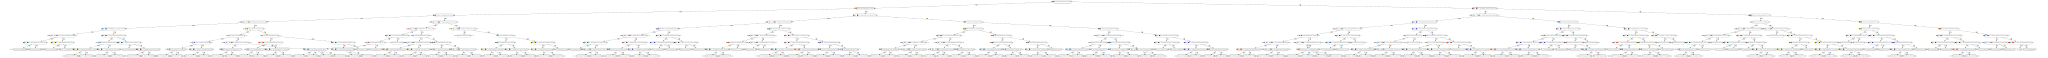

In [ ]:
model_1.print_tree()

### Hyperparameter Tuning for ID3-A

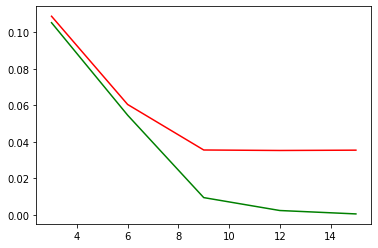

In [ ]:
max_depths = [i*3 for i in range(1,6)]
h_model = ID3_A_regressor()
rmse_train = []
rmse_test = []
for max_depth in max_depths:
  h_model.fit(X_train,Y_train,max_depth = max_depth)
  rmse_train.append(rmse(Y_train,h_model.predict(X_train)))
  rmse_test.append(rmse(Y_test,h_model.predict(X_test)))
plt.plot(max_depths,rmse_test,'r')
plt.plot(max_depths,rmse_train,'g')

Best Value of max_depth for ID3-A = 9

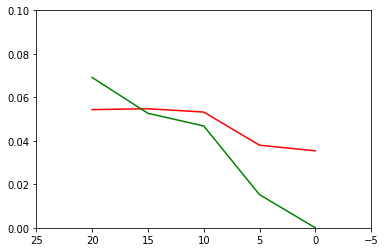

In [ ]:
min_inst = [30-5*i for i in range(2,7)]
h_model = ID3_A_regressor()
rmse_train = []
rmse_test = []
for min_instances in min_inst:
  h_model.fit(X_train,Y_train,min_instances=min_instances)
  rmse_train.append(rmse(Y_train,h_model.predict(X_train)))
  rmse_test.append(rmse(Y_test,h_model.predict(X_test)))
plt.plot(min_inst,rmse_test,'r')
plt.plot(min_inst,rmse_train,'g')
plt.axis([25,-5,0,0.1])
plt.show()

Best Value of min_instances for ID3-A = 5

### Comparing Results of CART and ID3-A Regressors

Taking the best ID3-A model after hyperparameter tuning

In [ ]:
model_1 = ID3_A_regressor()
model_1.fit(X_train,Y_train,max_depth = 9, min_instances = 5)

Taking the best CART model after hyperparameter tuning

In [ ]:
model_2 = CART_regressor()
model_2.fit(X_train,Y_train,max_depth = 9, min_instances = 5)

In [ ]:
Y_hat_train = model_1.predict(X_train)

In [ ]:
Y_hat_test = model_1.predict(X_test)

In [ ]:
Y_hat_train_cart = model_2.predict(X_train)

In [ ]:
Y_hat_test_cart = model_2.predict(X_test)

In [ ]:
Y_train = Y_train.apply(inverse_transform, args=(minmax_arr, ))
Y_hat_train = Y_hat_train.apply(inverse_transform, args=(minmax_arr, ))
Y_test = Y_test.apply(inverse_transform, args=(minmax_arr, ))
Y_hat_test = Y_hat_test.apply(inverse_transform, args=(minmax_arr, ))
Y_hat_train_cart = Y_hat_train_cart.apply(inverse_transform, args=(minmax_arr, ))
Y_hat_test_cart = Y_hat_test_cart.apply(inverse_transform, args=(minmax_arr, ))

In [ ]:
print("CART Regressor Results")
print("Training Mean Squared Error :", mse(Y_train, Y_hat_train_cart)) 
print("Training Root Mean Squared Error :", rmse(Y_train, Y_hat_train_cart))
print("Testing Mean Squared Error :", mse(Y_test, Y_hat_test_cart)) 
print("Testing Root Mean Squared Error :", rmse(Y_test, Y_hat_test_cart))
print("Testing R2 Score :", r2_score(Y_test,Y_hat_test_cart))

CART Regressor Results
Training Mean Squared Error : 116687138.91338982
Training Root Mean Squared Error : 10802.182136651363
Testing Mean Squared Error : 847994738.8276757
Testing Root Mean Squared Error : 29120.34922228227
Testing R2 Score : 0.8927265035245234


In [ ]:
print("ID3-A Regressor Results: ")
print("Training Mean Squared Error :", mse(Y_train, Y_hat_train)) 
print("Training Root Mean Squared Error :", rmse(Y_train, Y_hat_train))
print("Testing Mean Squared Error :", mse(Y_test, Y_hat_test)) 
print("Testing Root Mean Squared Error :", rmse(Y_test, Y_hat_test))
print("Testing R2 Score :", r2_score(Y_test,Y_hat_test))

ID3-A Regressor Results: 
Training Mean Squared Error : 43839236.46719557
Training Root Mean Squared Error : 6621.12048426817
Testing Mean Squared Error : 246911599.60049006
Testing Root Mean Squared Error : 15713.42100245806
Testing R2 Score : 0.9687650531345101


### Defining own Kmeans Algorithm

In [ ]:
class Kmeans:

    def __init__(self, n_clusters=3, max_iter=500, metric="euclidean", random_state = 134):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.metric = metric
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids, metric):
        distance = np.zeros((X.shape[0], self.n_clusters))
        if(metric == 'euclidean'):
          for k in range(self.n_clusters):
              row_norm = norm(X - centroids[k, :], axis=1)
              distance[:, k] = np.square(row_norm)
        if(metric == 'manhattan'):
          for k in range(self.n_clusters):
              diff = X - centroids[k, :]
              distance[:, k] = np.sum(abs(diff),axis=1)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids, self.metric)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
  
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids,self.metric)
        return self.find_closest_cluster(distance)

### Checking Elbow Point to find best k in Kmeans

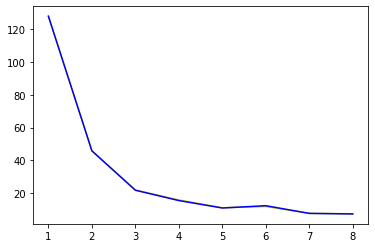

In [ ]:
k_values = [i+1 for i in range(8)]
wcss_values_euc = []
wcss_values_manh = []

for k in k_values:
  kmodel = Kmeans(metric = 'manhattan',n_clusters = k,max_iter=10000)
  kmodel.fit(np.array(X_train))
  wcss_values_manh.append(kmodel.compute_sse(np.array(X_train),kmodel.labels, kmodel.centroids))
for k in k_values:
  kmodel = Kmeans(metric = 'euclidean',n_clusters = k,max_iter=10000)
  kmodel.fit(np.array(X_train))
  wcss_values_euc.append(kmodel.compute_sse(np.array(X_train),kmodel.labels, kmodel.centroids))

plt.plot(k_values,wcss_values_manh,'y')
plt.plot(k_values,wcss_values_euc,'b')

Best K for K-means = 4

### Defining own function for creating forest

In [ ]:
class forest():

  def __init__(self,tree_class,n_trees=4,max_depth= float('inf'),min_instances=0,tol = 0):
    self.tree_class = tree_class
    self.n_trees = n_trees
    self.max_depth = max_depth
    self.min_instances = min_instances
    self.tol = tol
    self.trees = []
    self.labels = None
    self.clustering_model = None

  def fit_dec_tree(self,X,y):
    model = self.tree_class()
    model.fit(X,y,self.max_depth, self.tol, self.min_instances)
    return model

  def fit(self,X,y,clustering_metric = 'euclidean',max_iter=500):
    self.clustering_model = Kmeans(metric = 'euclidean',n_clusters = self.n_trees,max_iter=max_iter)
    self.clustering_model.fit(np.array(X))
    self.labels = self.clustering_model.predict(np.array(X))
    self.trees = [self.fit_dec_tree(X[self.labels==i],y[self.labels==i]) for i in range(self.n_trees)]

  def predict(self,X):
    y_pred = []
    closest_cluster = self.clustering_model.predict(np.array(X))
    for i in range(X.shape[0]):
      trial = self.trees[closest_cluster[i]].predict(X.iloc[[i]])
      y_pred.append(trial[i])
    return pd.Series(y_pred)
    # y_pred = np.zeros(X.shape[0])
    # prob_cluster = []
    # for i in np.unique(self.labels):
    #   prob_cluster.append(np.sum(self.labels==i)/len(self.labels))
    #   y_pred += self.trees[i].predict(X)*prob_cluster[i]
    # return y_pred

### Comapring results of ID3-A and CART Forests

In [ ]:
X_train = X_train.reset_index(drop=True)

In [ ]:
Y_train = Y_train.reset_index(drop=True)

In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
Y_test = Y_test.reset_index(drop=True)

In [ ]:
Y_train = Y_train.apply(scale_y, args=(minmax_arr, ))

In [ ]:
Y_test = Y_test.apply(scale_y, args=(minmax_arr, ))

In [ ]:
cart_forest = forest(CART_regressor,n_trees = 4,max_depth = 9, min_instances = 5)
cart_forest.fit(X_train,Y_train,max_iter=2000)
y_cart_forest_train_pred = cart_forest.predict(X_train)
y_test_cart_forest_pred = cart_forest.predict(X_test)

In [ ]:
id3_a_forest = forest(ID3_A_regressor,n_trees = 4,max_depth = 9, min_instances = 5)
id3_a_forest.fit(X_train,Y_train,max_iter=2000)
y_id3_a_forest_train_pred = id3_a_forest.predict(X_train)
y_test_id3_a_forest_pred = id3_a_forest.predict(X_test)

In [ ]:
Y_train = Y_train.apply(inverse_transform, args=(minmax_arr, ))
Y_test = Y_test.apply(inverse_transform, args=(minmax_arr, ))
y_cart_forest_train_pred = y_cart_forest_train_pred.apply(inverse_transform, args=(minmax_arr, ))
y_test_cart_forest_pred = y_test_cart_forest_pred.apply(inverse_transform, args=(minmax_arr, ))
y_id3_a_forest_train_pred = y_id3_a_forest_train_pred.apply(inverse_transform, args=(minmax_arr, ))
y_test_id3_a_forest_pred = y_test_id3_a_forest_pred.apply(inverse_transform, args=(minmax_arr, ))

In [ ]:
print("Train Root Mean Squared Error for CART forest: " ,rmse(Y_train,y_cart_forest_train_pred))
print("Test Root Mean Squared Error for CART forest: " ,rmse(Y_test,y_test_cart_forest_pred))
print("R2 Score for CART forest: " ,r2_score(Y_test, y_test_cart_forest_pred))

Train Root Mean Squared Error for CART forest:  8363.682034413703
Test Root Mean Squared Error for CART forest:  22586.956236788144
R2 Score for CART forest:  0.9354621193958925


In [ ]:
print("Train Root Mean Squared Error for ID3-A forest: " ,rmse(Y_train,y_id3_a_forest_train_pred))
print("Test Root Mean Squared Error for ID3-A forest: " ,rmse(Y_test,y_test_id3_a_forest_pred))
print("R2 Score for ID3-A forest: " ,r2_score(Y_test, y_test_id3_a_forest_pred))

Train Root Mean Squared Error for ID3-A forest:  6358.654735759589
Test Root Mean Squared Error for ID3-A forest:  13789.937191707206
R2 Score for ID3-A forest:  0.9759439756490338
